In [3]:
# importa os pacotes necessários
import numpy as np
import os, gc, cv2, random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import  cross_val_score

from sklearn import svm
from skimage.feature import greycomatrix, greycoprops
from skimage.feature import hog
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
import glob
from natsort import natsorted
from PIL import Image

In [2]:
df = pd.read_csv('kaggle/data_pca.csv')
df_labels = pd.read_csv('kaggle/data_labels.csv')

In [3]:
#df=(df-df.min())/(df.max()-df.min())

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, df_labels.label.values, test_size = 0.3, random_state = 42)
del df
X_train.shape,X_test.shape

((35000, 2500), (15000, 2500))

# Logistic Regression
Utilizando regressão logistica para ter uma base de comparação com os demais modelos.

#### nomalizado antes e padding

In [5]:
%%time
logreg = LogisticRegression(solver='saga',n_jobs=2)
logreg.fit(X_train, y_train)

Wall time: 8min 42s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=2, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# avalia predicao
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.602136,0.633367,0.448193,0.376615,0.452621,0.439560,0.610732,0.611316,0.709432,0.627002,0.5532,0.551097,0.550901
precision,0.592252,0.623198,0.463345,0.395714,0.451524,0.452675,0.583230,0.610294,0.696818,0.624756,0.5532,0.549381,0.549338
recall,0.612356,0.643873,0.434000,0.359274,0.453723,0.427184,0.640956,0.612341,0.722510,0.629265,0.5532,0.553548,0.553200
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.5532,15000.000000,15000.000000


In [7]:
%%time
logreg = LogisticRegression(solver='saga',n_jobs=4)
logreg.fit(X_train.iloc[:,:1500], y_train)

Wall time: 4min 31s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=4, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# avalia predicao
y_pred = logreg.predict(X_test.iloc[:,:1500])
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.583333,0.618705,0.422565,0.366985,0.455473,0.427373,0.588689,0.584270,0.688316,0.604092,0.536667,0.533980,0.533731
precision,0.577512,0.598355,0.445347,0.387050,0.460826,0.443593,0.556163,0.575896,0.677743,0.598071,0.536667,0.532056,0.531970
recall,0.589274,0.640487,0.402000,0.348898,0.450244,0.412298,0.625256,0.592891,0.699224,0.610236,0.536667,0.537081,0.536667
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.536667,15000.000000,15000.000000


# Linear SVM
Classificador SVM otimizado para o kernel linear, pode não dar o mesmo 
resultado se comparado ao sklearn.svm.SVC(), mas tem um tempo de execução menor

In [9]:
%%time
svclassifier = LinearSVC()
svclassifier.fit(X_train, y_train)

Wall time: 21min


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [10]:
# avalia predicao
y_pred = svclassifier.predict(X_test)
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.555868,0.608581,0.399725,0.347711,0.404295,0.393487,0.585232,0.575927,0.680680,0.584398,0.517067,0.513590,0.513424
precision,0.576111,0.593690,0.412181,0.355978,0.431962,0.413400,0.527382,0.563543,0.651865,0.599310,0.517067,0.512542,0.512407
recall,0.536999,0.624238,0.388000,0.339818,0.379958,0.375405,0.657338,0.588867,0.712160,0.570210,0.517067,0.517299,0.517067
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.517067,15000.000000,15000.000000


Com os primeiros 1500 componentes.

In [5]:
%%time
svclassifier = LinearSVC()
svclassifier.fit(X_train.iloc[:,:1500], y_train)

CPU times: user 26min, sys: 879 ms, total: 26min 1s
Wall time: 26min 4s


In [6]:
# avalia predicao
y_pred = svclassifier.predict(X_test.iloc[:,:1500])
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.573716,0.590704,0.380952,0.334598,0.418723,0.398111,0.575089,0.551105,0.665356,0.561746,0.5094,0.505010,0.504711
precision,0.563934,0.564466,0.430976,0.357406,0.437453,0.415786,0.510312,0.527607,0.674419,0.557929,0.5094,0.504029,0.504013
recall,0.583842,0.619499,0.341333,0.314527,0.401531,0.381877,0.658703,0.576794,0.656533,0.565617,0.5094,0.510026,0.509400
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.5094,15000.000000,15000.000000


# Radial basis function SVM

In [11]:
%%time
rbfsvclassifier = SVC(kernel='rbf', tol=0.002)
rbfsvclassifier.fit(X_train, y_train)

Wall time: 58min 46s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.002, verbose=False)

In [12]:
# avalia predicao
y_pred = rbfsvclassifier.predict(X_test)
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.622578,0.663833,0.469619,0.392224,0.483274,0.469346,0.615527,0.605580,0.725260,0.652906,0.572667,0.570015,0.569822
precision,0.612755,0.641999,0.484076,0.413669,0.494538,0.495327,0.562783,0.622521,0.730013,0.632615,0.572667,0.569030,0.569074
recall,0.632722,0.687204,0.456000,0.372892,0.472512,0.445955,0.679181,0.589537,0.720569,0.674541,0.572667,0.573111,0.572667
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.572667,15000.000000,15000.000000


Com os primeiros 1500 componentes.

In [5]:
%%time
rbfsvclassifier = SVC(kernel='rbf', tol=0.002)
rbfsvclassifier.fit(X_train.iloc[:,:1500], y_train)

CPU times: user 38min 54s, sys: 964 ms, total: 38min 55s
Wall time: 38min 56s


In [6]:
# avalia predicao
y_pred = rbfsvclassifier.predict(X_test.iloc[:,:1500])
report = classification_report(y_test, y_pred,output_dict = True)
pd.DataFrame(report)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,accuracy,macro avg,weighted avg
f1-score,0.641672,0.677377,0.486280,0.418357,0.499125,0.482149,0.626809,0.624827,0.739187,0.668579,0.588333,0.586436,0.586263
precision,0.627515,0.656707,0.507614,0.429352,0.502113,0.507880,0.581436,0.646805,0.749004,0.649938,0.588333,0.585836,0.585909
recall,0.656483,0.699391,0.466667,0.407912,0.496173,0.458900,0.679863,0.604292,0.729625,0.688320,0.588333,0.588763,0.588333
support,1473.000000,1477.000000,1500.000000,1542.000000,1437.000000,1545.000000,1465.000000,1491.000000,1546.000000,1524.000000,0.588333,15000.000000,15000.000000


# Rede Neural TensorFlow

In [4]:
# carrega as imagens e os labels
new_filelist = glob.glob('kaggle/train/*.png')
filelist = natsorted(new_filelist)
all_images = np.array([np.array(Image.open(fname)) for fname in filelist])
all_labels = pd.read_csv('kaggle/data_labels.csv')

# divide as imagens e labels em treino e teste
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels.label.values, 
                                                                        test_size = 0.3, random_state=42)
# libera memoria das variaveis auxiliares
del all_images
del all_labels
del new_filelist
del filelist

# normaliza pixeis com valores entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# cria um modelo basico
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# formata os dados para a chamada de funcao

# cria valores para cada label
encoder = LabelEncoder()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
transfomed_label = encoder.fit_transform(labels)
df = pd.DataFrame(columns=['name', 'value'])

# troca os labels pelos novos valores criados
for i in range(10):
    df = df.append({'name': labels[i], 'value':transfomed_label[i]}, ignore_index=True)
for i in range(test_labels.size):
    test_labels[i] = df.loc[df['name'] == test_labels[i], 'value'].iloc[0]
for i in range(train_labels.size):
    train_labels[i] = df.loc[df['name'] == train_labels[i], 'value'].iloc[0]

# muda o tipo do array para int ( para satisfazer o argumento do keras)
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

In [7]:
# escolha de um modelo simples e com poucas epocas
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 18s 522us/sample - loss: 1.6757 - acc: 0.3784 - val_loss: 1.4083 - val_acc: 0.4882
Epoch 2/10
35000/35000 [==============================] - 15s 440us/sample - loss: 1.3144 - acc: 0.5274 - val_loss: 1.1920 - val_acc: 0.5845
Epoch 3/10
35000/35000 [==============================] - 15s 439us/sample - loss: 1.1516 - acc: 0.5921 - val_loss: 1.1390 - val_acc: 0.5995
Epoch 4/10
35000/35000 [==============================] - 15s 441us/sample - loss: 1.0452 - acc: 0.6328 - val_loss: 1.1146 - val_acc: 0.6189
Epoch 5/10
35000/35000 [==============================] - 16s 463us/sample - loss: 0.9631 - acc: 0.6619 - val_loss: 0.9565 - val_acc: 0.6658
Epoch 6/10
35000/35000 [==============================] - 15s 441us/sample - loss: 0.8987 - acc: 0.6850 - val_loss: 0.9335 - val_acc: 0.6759
Epoch 7/10
35000/35000 [==============================] - 15s 438us/sample - loss: 0.8431 - acc: 0.7036 

15000/15000 - 2s - loss: 0.8982 - acc: 0.6945


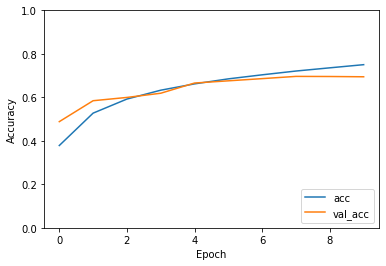

In [9]:
# precisao e a validacao dos dados em forma grafica
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)